<a href="https://colab.research.google.com/github/sinaebrahimi/ml-7072cem/blob/master/Classifying%20Network%20Slices%20Based%20on%20User%20Requirements/prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np

df_train_cleaned = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/train_cleaned.csv')


df_test_cleaned = pd.read_csv(filepath_or_buffer='/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/test_cleaned.csv')

df_train_cleaned.head(n=5)

,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,10,1,0,0,1,0,0,0,1,0,0,0,3
1,100,0,1,1,0,1,0,0,0,0,0,0,1
2,300,0,1,0,1,0,0,0,0,0,0,1,1
3,100,0,1,0,1,0,0,0,0,0,0,1,1
4,50,1,0,0,1,0,0,0,0,1,0,0,2



----------------
Training and predicting with Random Forest...
Random Forest saved as Random Forest_classifier.pkl

----------------
Training and predicting with SVM...
SVM saved as SVM_classifier.pkl

----------------
Training and predicting with K-Nearest Neighbors...
K-Nearest Neighbors saved as K-Nearest Neighbors_classifier.pkl

----------------
Training and predicting with Decision Tree...
Decision Tree saved as Decision Tree_classifier.pkl


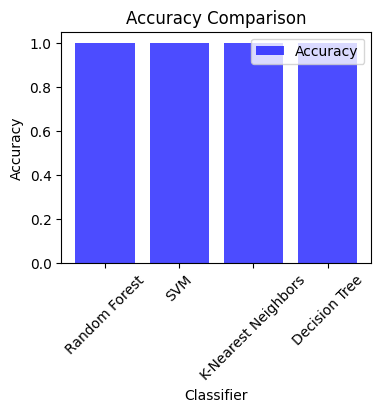

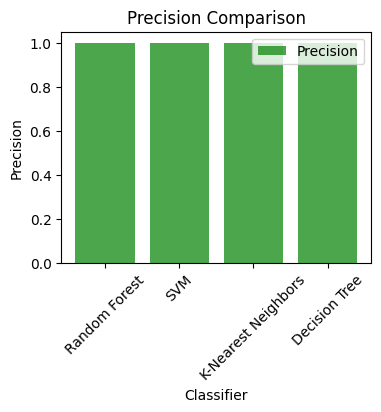

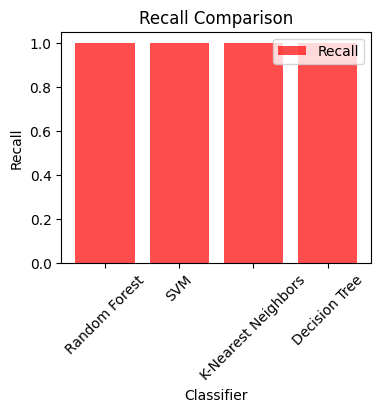

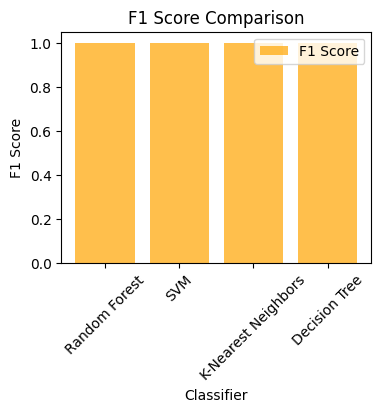

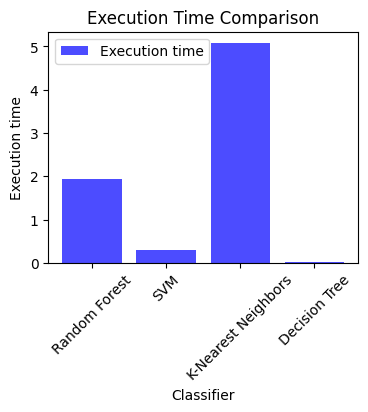

In [25]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import matplotlib.pyplot as plt

# Load the train dataset

# Split the train dataset into features and target variable
X = df_train_cleaned.drop(columns=['slice Type'])
y = df_train_cleaned['slice Type']

# Split the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Create dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
exec_times = {}

# Initialize a dictionary to store trained classifiers
trained_classifiers = {}

# Train classifiers on the training data and evaluate their performance on the test data
for name, classifier in classifiers.items():
    print(f"\n----------------\nTraining and predicting with {name}...")
    start_time = time.time()
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    end_time = time.time()
    exec_times[name] = end_time - start_time
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')
    ###
    # Save the trained classifier to a file
    filename = f'{name}_classifier.pkl'
    file_path = f'/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/' + filename
    joblib.dump(classifier, file_path)
    print(f"{name} saved as {filename}")

    # Store the trained classifier in the dictionary
    trained_classifiers[name] = classifier

# Plot evaluation metrics for each classifier
plt.figure(figsize=(4, 3))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue', alpha=0.7, label='Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

###############################
plt.figure(figsize=(4, 3))
plt.bar(precision_scores.keys(), precision_scores.values(), color='green', alpha=0.7, label='Precision')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(recall_scores.keys(), recall_scores.values(), color='red', alpha=0.7, label='Recall')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

################################
plt.figure(figsize=(4, 3))
plt.bar(f1_scores.keys(), f1_scores.values(), color='orange', alpha=0.7, label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#################################
plt.figure(figsize=(4, 3))
plt.bar(exec_times.keys(), exec_times.values(), color='blue', alpha=0.7, label='Execution time')
plt.xlabel('Classifier')
plt.ylabel('Execution time')
plt.title('Execution Time Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [29]:
# Load the trained classifiers
trained_classifiers = {}
for name in classifiers.keys():
    filename = f'/content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/{name}_classifier.pkl'
    trained_classifiers[name] = joblib.load(filename)
    print(f"Loaded {name} from {filename}")

X_test = df_test_cleaned
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test dataset using each classifier
predictions = {}
exec_times = {}

for name, classifier in trained_classifiers.items():
    print(f"Predicting with {name}...")
    start_time = time.time()
    y_pred = classifier.predict(X_test_scaled)
    predictions[name] = y_pred
    end_time = time.time()
    exec_times[name] = end_time - start_time

# Evaluate predictions (qualitatively)
for name, y_pred in predictions.items():
    print(f"Predictions using {name}:")
    print(pd.Series(y_pred).value_counts())
    print("\n")
    print(f"Execution time:")
    print(exec_times[name])
    print("\n------------")



Loaded Random Forest from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/Random Forest_classifier.pkl
Loaded SVM from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/SVM_classifier.pkl
Loaded K-Nearest Neighbors from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/K-Nearest Neighbors_classifier.pkl
Loaded Decision Tree from /content/drive/MyDrive/2024-01- 7072CEM (ML Module)/Project/slice_type_prediction/Decision Tree_classifier.pkl
Predicting with Random Forest...
Predicting with SVM...
Predicting with K-Nearest Neighbors...
Predicting with Decision Tree...
Predictions using Random Forest:
1    16800
3     7392
2     7392
dtype: int64


Execution time:
0.26735925674438477

------------
Predictions using SVM:
1    16800
3     7392
2     7392
dtype: int64


Execution time:
0.07575297355651855

------------
Predictions using K-Nearest Neighbors:
1    16800
3     7392
2     7392
dtype: i

In [27]:
print(exec_times)

{'Random Forest': 0.4269428253173828, 'SVM': 0.08047771453857422, 'K-Nearest Neighbors': 17.536547899246216, 'Decision Tree': 0.0023450851440429688}
